
# Linear Regression Project

### Based on the data Ecommerce data provided decide whether the company should spend on their mobile app experience or their website.


## Imports

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Load Data

The Ecommerce data has Customer info such as: 
* **Email**
* **Address**
* **color Avatar** 

It also has numerical value columns:

* **Avg. Session Length:** Average session of in-store style advice sessions.
* **Time on App:** Average time spent on App in minutes
* **Time on Website:** Average time spent on Website in minutes
* **Length of Membership:** How many years the customer has been a member. 
* **Yearly Amount Spent:** Total Money spent in an Year.


In [3]:
ecom = pd.read_csv("Ecommerce Customers")

**Check the head of customers, and check out its info() and describe() methods.**

In [4]:
ecom.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
ecom.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [7]:
ecom.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

## Exploratory Data Analysis

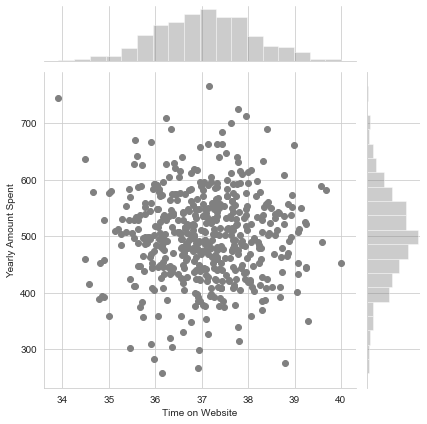

In [18]:
sns.set_style(style = 'whitegrid')
sns.jointplot(x=ecom['Time on Website'], y=ecom['Yearly Amount Spent'], color = 'gray')

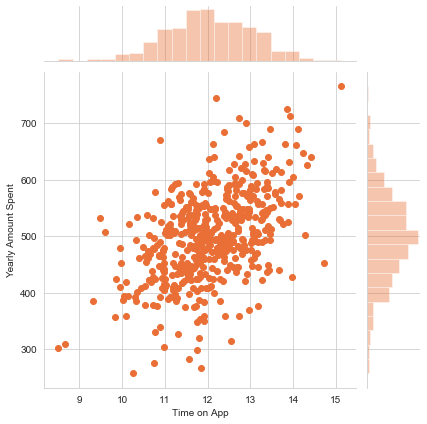

In [29]:
# sns.set_style(style = 'whitegrid')
sns.set_palette(palette='icefire_r')
sns.jointplot(x=ecom['Time on App'], y=ecom['Yearly Amount Spent'])

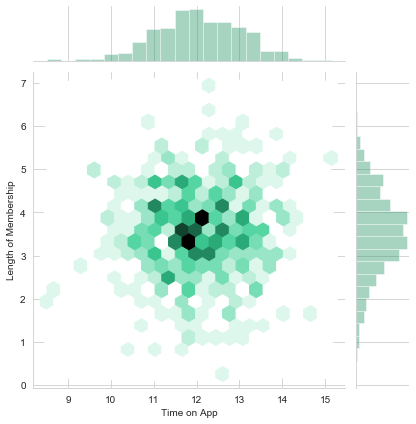

In [34]:
sns.set_palette(palette='summer')
sns.jointplot(x=ecom['Time on App'], y=ecom['Length of Membership'],kind='hex')

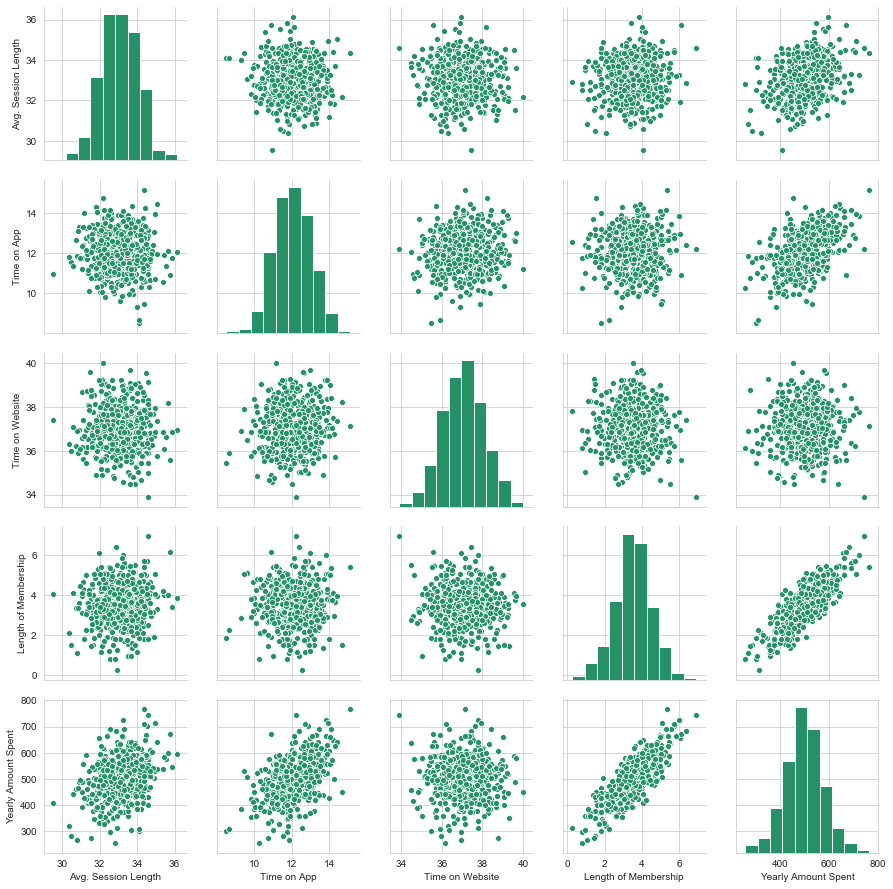

In [32]:
sns.pairplot(data = ecom)

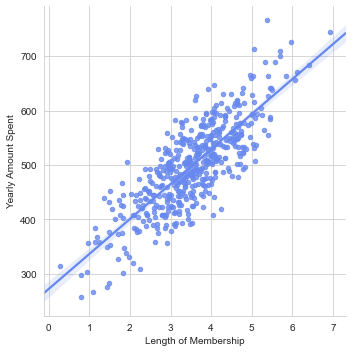

In [64]:
# sns.set_palette(palette='coolwarm')
sns.lmplot(y='Yearly Amount Spent', x = 'Length of Membership', data = ecom, 
           palette=sns.color_palette("RdBu", n_colors=7),scatter_kws={"s": 20})

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.  
  
* X = numerical features of the customers.  
* y = the "Yearly Amount Spent".  
* We will use 30% data as test data.

In [72]:
ecom.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [79]:
X = ecom[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y= ecom['Yearly Amount Spent']
print(X.head())
y.head()

   Avg. Session Length  Time on App  Time on Website  Length of Membership
0            34.497268    12.655651        39.577668              4.082621
1            31.926272    11.109461        37.268959              2.664034
2            33.000915    11.330278        37.110597              4.104543
3            34.305557    13.717514        36.721283              3.120179
4            33.330673    12.795189        37.536653              4.446308


0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 101)

In [82]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((350, 4), (150, 4), (350,), (150,))

## Training the Model

* Import LinearRegression from sklearn.linear_model
* Create an instance of a LinearRegression() model named lm.
* Train/fit LinearRegression instance on the training data.

In [84]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [85]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

## Predicting on Test Data

Now that we have fit our model, let's evaluate its performance using the test data!

* Use lm.predict() to make predictions on the X_test set of the data.
* Create a scatterplot of real vs predicted values of X_test data. **This will help to visualize how accurate our predictions were**

In [88]:
y_preds = lm.predict(X_test)
X_test.shape, y_preds.shape

((150, 4), (150,))

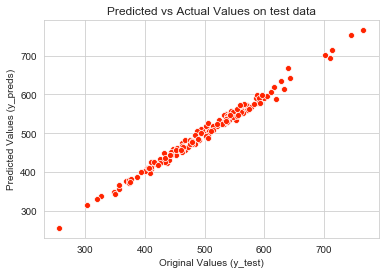

In [91]:
sns.set_palette('autumn')
sns.scatterplot(x=y_test, y=y_preds)
plt.xlabel("Original Values (y_test)")
plt.ylabel("Predicted Values (y_preds)")
plt.title ("Predicted vs Actual Values on test data")
plt.show()

## Evaluating the Model

Let's evaluate our model performance by calculating:

* Mean Absolute Error
* Mean Squared Error
* Root Mean Squared Error

In [93]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MAE:", mean_absolute_error(y_test, y_preds))
print("MSE:", mean_squared_error(y_test, y_preds))
print("RMSE:",np.sqrt( mean_squared_error(y_test, y_preds)))

MAE: 7.228148653430838
MSE: 79.81305165097461
RMSE: 8.933815066978642


### Let us also visualize our residuals to see how they are distributed.

**Note:** Below you see that the residuals are `normally distributed around zero`. This means that out model is a good fit.

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  2.,  1.,  1.,  4.,
         7.,  5.,  9.,  4.,  9.,  5.,  9., 10.,  5., 11., 10.,  9.,  8.,
         9.,  8.,  6.,  3.,  5.,  1.,  1.,  2.,  2.,  0.,  0.,  0.,  0.,
         1.]), array([-29.99857192, -28.57471436, -27.15085679, -25.72699923,
        -24.30314166, -22.87928409, -21.45542653, -20.03156896,
        -18.6077114 , -17.18385383, -15.75999626, -14.3361387 ,
        -12.91228113, -11.48842357, -10.064566  ,  -8.64070843,
         -7.21685087,  -5.7929933 ,  -4.36913574,  -2.94527817,
         -1.5214206 ,  -0.09756304,   1.32629453,   2.75015209,
          4.17400966,   5.59786723,   7.02172479,   8.44558236,
          9.86943992,  11.29329749,  12.71715506,  14.14101262,
         15.56487019,  16.98872775,  18.41258532,  19.83644289,
         21.26030045,  22.68415802,  24.10801558,  25.53187315,
         26.95573072]), <a list of 40 Patch objects>)

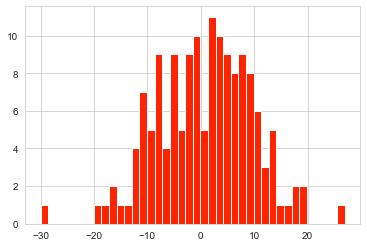

In [101]:
plt.hist(x=y_preds-y_test, bins= 40)

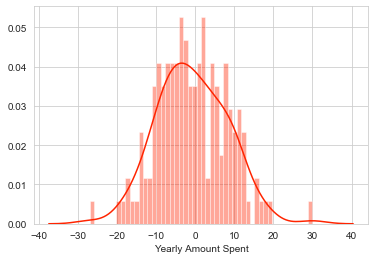

In [102]:
sns.distplot((y_test-y_preds),bins=50)

## Conclusion

We notice that it is membership time that is really important.  Let's see if we can interpret the coefficients to get an idea on how important each of the factor is.

In [104]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.27 total dollars spent**.

**Do you think the company should focus more on their mobile app or on their website?**

There are two ways to think about this: 

  
1) Develop the Website to catch up to the performance of the mobile app.  
  
2) develop the app more since that is what is working better. 
  
This sort of answer really depends on the other factors going on at the company, you would probably want to explore the relationship between Length of Membership and the App or the Website before coming to a conclusion!
